In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Thalassemia/Thalassemia2p.csv')
data.head()

,Gender,Type_of_Family,Occupational_Status,Area_of_Residence,Transfusion_Status,Frequency_of_Blood_Transfusion,Splenectomy_Status,Comorbidities_Status,Ironchelating_Therapy_Status,Medical_Expense,...,Physical_Functioning,Role_Physical,Bodily_Pain,Vitality,Mental_Health,Role_Emotional,Social_Functioning,Physical_Health_Summary,Total_SF_Score,Mental_Health_Status
0,0,2,1,1,0,0,0,3,0,180000,...,75,100,90.0,65,92,100.0,50.0,82.3,80.1,0
1,1,2,1,1,0,1,0,3,0,60000,...,100,100,100.0,90,92,100.0,50.0,94.0,89.6,0
2,0,2,1,0,0,1,0,3,0,96000,...,100,100,70.0,100,100,100.0,75.0,90.0,91.5,0
3,0,1,1,0,0,1,0,3,0,120000,...,100,100,100.0,90,92,100.0,52.5,94.0,89.9,0
4,1,2,1,1,0,0,1,3,0,150000,...,65,100,55.0,70,92,100.0,42.5,72.3,73.9,0


In [3]:
# Split features and target
X = data.drop('Mental_Health_Status', axis=1)
y = data['Mental_Health_Status']

# Display the encoded dataset
print(X)
print(y)

     Gender  Type_of_Family  Occupational_Status  Area_of_Residence  \
0         0               2                    1                  1   
1         1               2                    1                  1   
2         0               2                    1                  0   
3         0               1                    1                  0   
4         1               2                    1                  1   
..      ...             ...                  ...                ...   
351       0               0                    1                  0   
352       1               1                    1                  1   
353       0               2                    1                  1   
354       0               2                    1                  0   
355       0               2                    1                  0   

     Transfusion_Status  Frequency_of_Blood_Transfusion  Splenectomy_Status  \
0                     0                               0             

In [4]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=2a2effe19a5dbce96378b0f51dec25f98b46ae941fbdc78fe26fe904ad91c038
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [6]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6352792fbe81a7d285bdd9800bb7153c1cf0cdc17fc808e81cffd61b301de725
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

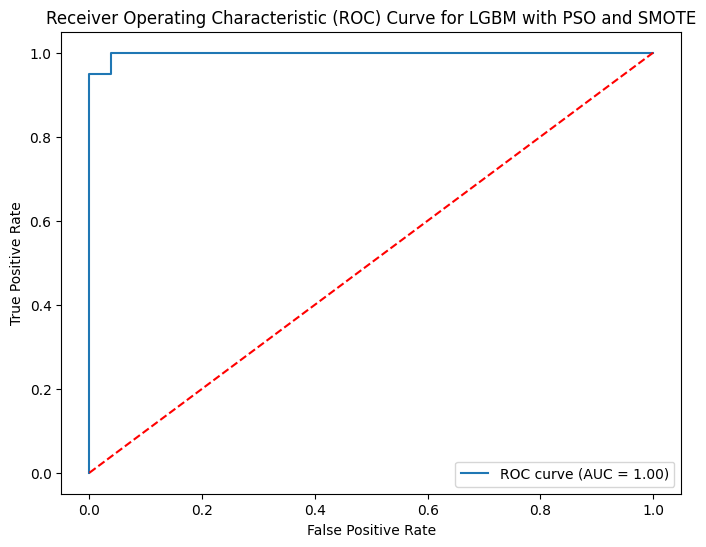

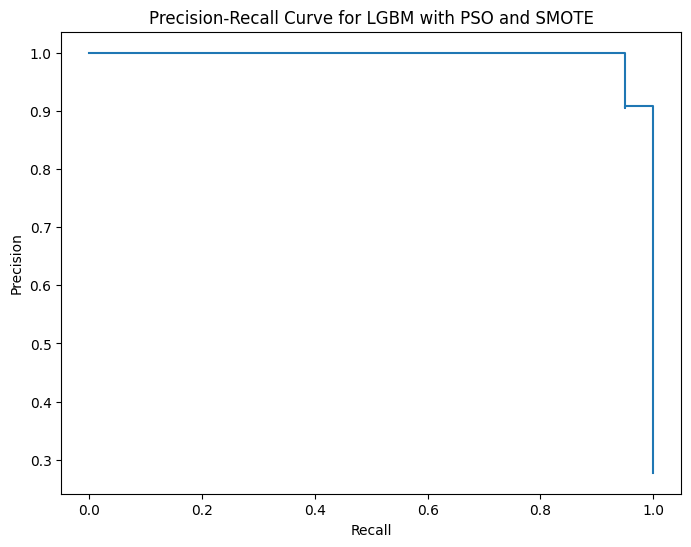

In [7]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the objective function for PSO to minimize the negative accuracy (maximize accuracy)
def objective_function(params):
    n_estimators = int(params[0])  # Number of estimators
    learning_rate = params[1]      # Learning rate
    max_depth = int(params[2])     # Maximum depth of trees

    # Initialize the LGBM classifier with the given parameters
    lgbm_classifier = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    # Train the model on resampled training data
    lgbm_classifier.fit(X_train_res, y_train_res)

    # Evaluate on test set
    y_test_pred = lgbm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    # Return the negative of the accuracy because PSO minimizes the objective function
    return -accuracy

# Set the bounds for the parameters (n_estimators, learning_rate, max_depth)
lb = [10, 0.01, 3]  # Lower bounds for [n_estimators, learning_rate, max_depth]
ub = [200, 1.0, 15]  # Upper bounds for [n_estimators, learning_rate, max_depth]

# Run PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=20)

# Extract the best parameters from the result
best_n_estimators = int(best_params[0])
best_learning_rate = best_params[1]
best_max_depth = int(best_params[2])

# Train the LGBM classifier with the optimized hyperparameters
lgbm_classifier = LGBMClassifier(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42
)
lgbm_classifier.fit(X_train_res, y_train_res)

# Evaluate on test set
y_test_pred = lgbm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)



# Calculate ROC curve and AUC for binary classification on test set
y_pred_probs = lgbm_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LGBM with PSO and SMOTE')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for binary classification
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.step(recall_curve, precision_curve, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LGBM with PSO and SMOTE')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


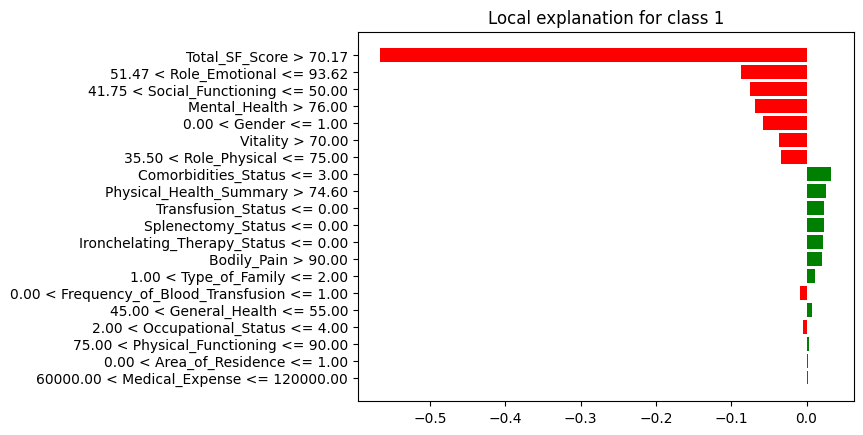

In [8]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_res.values,  # Use resampled training data
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in np.unique(y_train)],
    mode='classification'
)

# Define prediction function for LIME
predict_fn = lambda x: lgbm_classifier.predict_proba(x)

# Select a test instance to explain
observation_idx = 0  # Change index to analyze different instances
observation = X_test.iloc[observation_idx].values.reshape(1, -1)

# Generate LIME explanation for the instance
exp = explainer.explain_instance(observation[0], predict_fn, num_features=len(X_train.columns))

# Show the explanation in notebook
exp.show_in_notebook(show_table=True, show_all=False)

# Save explanation as a figure
fig = exp.as_pyplot_figure()
fig.savefig("lime_explanation.png")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


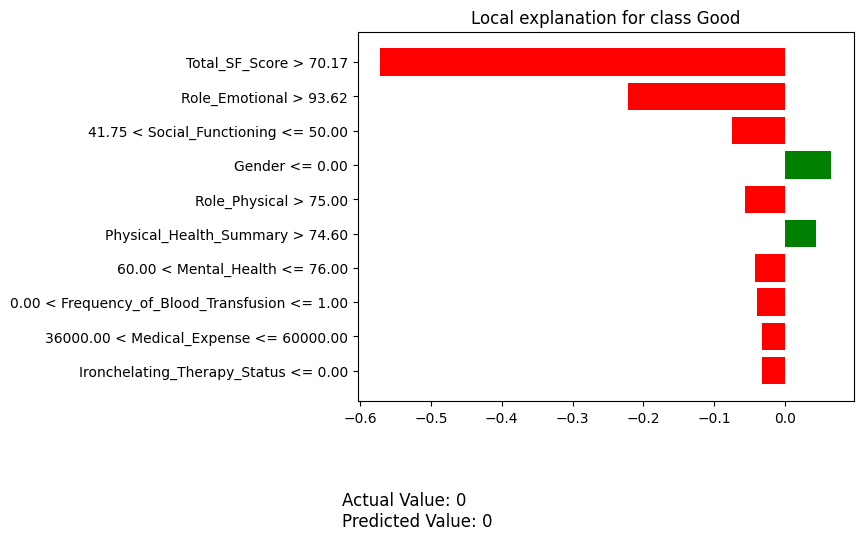

In [10]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Select an instance from the test set for explanation
instance_idx = 10  # Change this index to analyze different samples
instance = X_test.iloc[instance_idx].values.reshape(1, -1)

# Get actual and predicted values
actual_value = y_test.iloc[instance_idx]
predicted_value = lgbm_classifier.predict(instance)[0]

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_res),
    feature_names=X_train_res.columns,
    class_names=['Bad', 'Good'],  # Modify based on your classes
    mode='classification'
)

# Generate explanation
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=lgbm_classifier.predict_proba
)

# Save the explanation plot as a PDF with actual and predicted values
with PdfPages('explanation_plot_lgbm_pso_smote.pdf') as pdf:
    fig = exp.as_pyplot_figure()

    # Add actual & predicted values below the plot
    plt.text(0.1, -0.15,
             f"Actual Value: {actual_value}\nPredicted Value: {predicted_value}",
             transform=fig.transFigure, fontsize=12)

    pdf.savefig(fig)  # Save to PDF
    plt.show()  # Display the plot


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


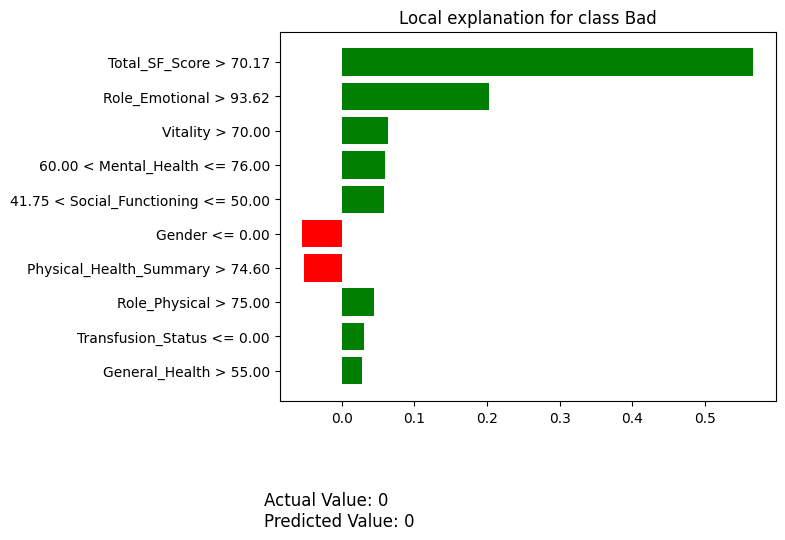

In [11]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Select an instance from the test set for explanation
instance_idx = 10  # Change this index to analyze different samples
instance = X_test.iloc[instance_idx].values.reshape(1, -1)

# Get actual and predicted values
actual_value = y_test.iloc[instance_idx]
predicted_value = lgbm_classifier.predict(instance)[0]

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_res),
    feature_names=X_train_res.columns,
    class_names=['Bad', 'Good'],  # Modify based on your classes
    mode='classification'
)

# Generate explanation, forcing "Bad" (class 0) explanation
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=lgbm_classifier.predict_proba,
    labels=[0]  # Force explanation for "Bad"
)

# Save the explanation plot as a PDF with actual and predicted values
with PdfPages('explanation_plot_lgbm_pso_smote.pdf') as pdf:
    fig = exp.as_pyplot_figure(label=0)  # Ensure it explains "Bad"

    # Add actual & predicted values below the plot
    plt.text(0.1, -0.15,
             f"Actual Value: {actual_value}\nPredicted Value: {predicted_value}",
             transform=fig.transFigure, fontsize=12)

    pdf.savefig(fig)  # Save to PDF
    plt.show()  # Display the plot
